**step 1: import libraries**

In [ ]:
import pandas as pd
from datetime import datetime
import numpy as np 
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


import numbers
import math
import seaborn as sns

**step 2: read data and keep the wanted columns**

In [ ]:
covid = pd.read_csv("data-by-day.csv")
covid.columns

Index(['date_of_interest', 'CASE_COUNT', 'PROBABLE_CASE_COUNT',
       'HOSPITALIZED_COUNT', 'DEATH_COUNT', 'PROBABLE_DEATH_COUNT',
       'CASE_COUNT_7DAY_AVG', 'ALL_CASE_COUNT_7DAY_AVG', 'HOSP_COUNT_7DAY_AVG',
       'DEATH_COUNT_7DAY_AVG', 'ALL_DEATH_COUNT_7DAY_AVG', 'BX_CASE_COUNT',
       'BX_PROBABLE_CASE_COUNT', 'BX_HOSPITALIZED_COUNT', 'BX_DEATH_COUNT',
       'BX_PROBABLE_DEATH_COUNT', 'BX_CASE_COUNT_7DAY_AVG',
       'BX_ALL_CASE_COUNT_7DAY_AVG', 'BX_HOSPITALIZED_COUNT_7DAY_AVG',
       'BX_DEATH_COUNT_7DAY_AVG', 'BX_ALL_DEATH_COUNT_7DAY_AVG',
       'BK_CASE_COUNT', 'BK_PROBABLE_CASE_COUNT', 'BK_HOSPITALIZED_COUNT',
       'BK_DEATH_COUNT', 'BK_PROBABLE_DEATH_COUNT', 'BK_CASE_COUNT_7DAY_AVG',
       'BK_ALL_CASE_COUNT_7DAY_AVG', 'BK_HOSPITALIZED_COUNT_7DAY_AVG',
       'BK_DEATH_COUNT_7DAY_AVG', 'BK_ALL_DEATH_COUNT_7DAY_AVG',
       'MN_CASE_COUNT', 'MN_PROBABLE_CASE_COUNT', 'MN_HOSPITALIZED_COUNT',
       'MN_DEATH_COUNT', 'MN_PROBABLE_DEATH_COUNT', 'MN_CASE_COUNT_7DAY_AVG'

In [ ]:
keep_columns_covid = ['date_of_interest', 'CASE_COUNT','CASE_COUNT_7DAY_AVG' ]
covid = covid[keep_columns_covid]
covid['date_of_interest'] = pd.to_datetime(covid['date_of_interest'])
covid = covid.rename(columns={"date_of_interest": "date"})

start_date = "2020-03-01"
end_date = "2021-02-28"

after_start_date = covid["date"] >= start_date
before_end_date = covid["date"] <= end_date
between_two_dates = after_start_date & before_end_date

covid = covid.loc[between_two_dates]

In [ ]:
mar2020 = pd.read_csv("JC-202003-citibike-tripdata.csv")
apr2020 = pd.read_csv("JC-202004-citibike-tripdata.csv")
may2020 = pd.read_csv("JC-202005-citibike-tripdata.csv")
jun2020 = pd.read_csv("JC-202006-citibike-tripdata.csv")
jul2020 = pd.read_csv("JC-202007-citibike-tripdata.csv")
aug2020 = pd.read_csv("JC-202008-citibike-tripdata.csv")
sep2020 = pd.read_csv("JC-202009-citibike-tripdata.csv")
oct2020 = pd.read_csv("JC-202010-citibike-tripdata.csv")
nov2020 = pd.read_csv("JC-202011-citibike-tripdata.csv")
dec2020 = pd.read_csv("JC-202012-citibike-tripdata.csv")
jan2021 = pd.read_csv("JC-202101-citibike-tripdata.csv")
feb2021 = pd.read_csv("JC-202102-citibike-tripdat.csv")

bike = [mar2020, apr2020, may2020, jun2020, jul2020, aug2020, sep2020, oct2020, nov2020, dec2020, jan2021, feb2021]
bike = pd.concat(bike)

bike['date'] = pd.to_datetime(bike['starttime']).dt.normalize()
bike.columns


Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [ ]:
drop_column = ['starttime','stoptime','start station id','start station name',
               'start station latitude','start station longitude','end station id','end station name','end station latitude','end station longitude',
               'bikeid', 'usertype','birth year','gender']

bike['date'] = pd.to_datetime(bike['starttime']).dt.normalize()
bike = bike.drop(columns=drop_column)



**step 3: Data Cleaning and Exploratory Data Analysis**

First of all, we need to preview the dataset and do the 4 C's of data cleaning based on the observations.

4 C's of data: Correcting, Completing, Creating and Converting.
 

In [ ]:
covid

,date,CASE_COUNT,CASE_COUNT_7DAY_AVG
1,2020-03-01,0,0
2,2020-03-02,0,0
3,2020-03-03,1,0
4,2020-03-04,5,0
5,2020-03-05,3,0
...,...,...,...
361,2021-02-24,3440,2899
362,2021-02-25,3458,3102
363,2021-02-26,3204,3129
364,2021-02-27,1973,3056


In [ ]:
bike

,tripduration,date
0,389,2020-03-01
1,242,2020-03-01
2,124,2020-03-01
3,104,2020-03-01
4,228,2020-03-01
...,...,...
4732,150,2021-02-28
4733,170,2021-02-28
4734,140,2021-02-28
4735,377,2021-02-28


Here are the definitions of columns of data frames above. For the column have "7DAY_AVG" in name, the time frame is current day and previous 6 days. The COVID dataset is from New York City government website.


*   tripduration: the duration of each trip measured in seconds
*   CASE_COUNT: Count of confirmed cases citywide
*   CASE_COUNT_7DAY_AVG: 7-day average of count of confirmed cases citywide 



**step 3.1: correcting**

Since the COVID data is from government website, we believe all the data are true and vaild. In the correcting step, we will focus on the cloumns from citibike trips data. But here we include the histograms of COVID data too.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a5affd750>,
      dtype=object)

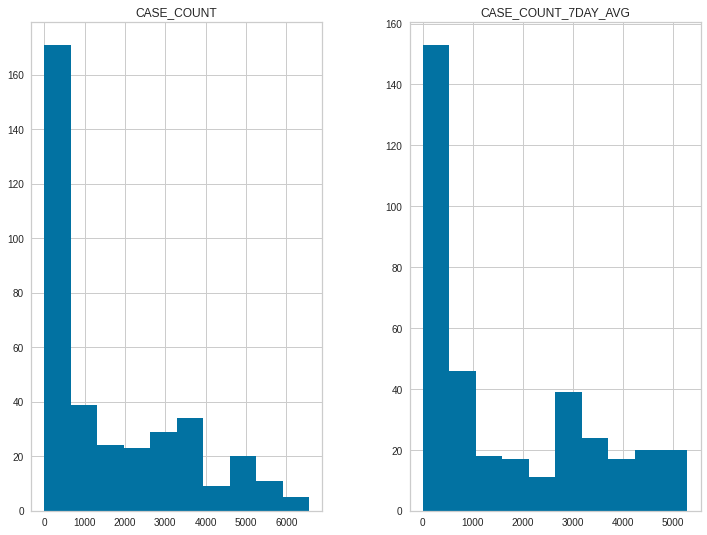

In [ ]:
covid.hist(figsize=(12, 9))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a72d7f5d0>]],
      dtype=object)

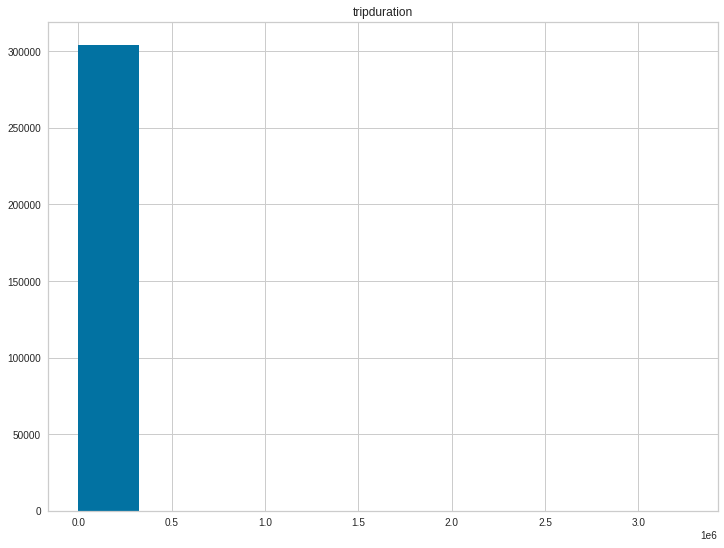

In [ ]:
bike.hist(figsize=(12, 9))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


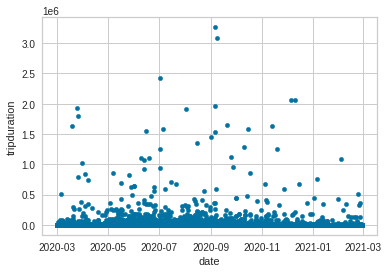

In [ ]:
bike.plot.scatter(x ='date', y='tripduration')

In [ ]:
bike.describe()

,tripduration
count,3.041810e+05
mean,1.710666e+03
std,1.895378e+04
min,6.100000e+01
25%,3.610000e+02
50%,6.920000e+02
75%,1.566000e+03
max,3.261756e+06


Since the histogram of tripduration is so weird, we use describe() function and the scatter plot to make further inspection, we do find some outliers in the column of tripduration.

**step 3.1.1: correcting tripduration**

From the scatter plot of tripduration, we found there are 3 extremely obvious outlier trips that each trip is significantly longer than 2300000 seconds which is about 26.7 days. Also there are dozens of trips that are longer than 259200 seconds which is 3 days, the maximum length to hold the bike for Customers.

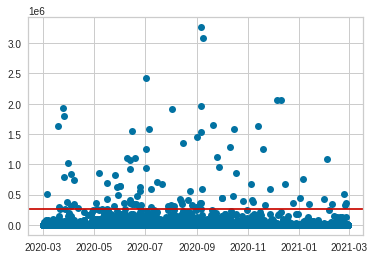

In [ ]:
x = bike.date
y = bike.tripduration

ig, ax = plt.subplots()
ax.plot(x,y, 'o')
ax.axhline(y=259200, color='r')

plt.show()

In [ ]:
outlier = [mar2020, apr2020, may2020, jun2020, jul2020, aug2020, sep2020, oct2020, nov2020, dec2020, jan2021, feb2021]
outlier = pd.concat(outlier)[['usertype','tripduration']]
outlier = outlier.usertype[outlier.tripduration>259200]
outlier = outlier[outlier == 'Customer'].index

Based on the usertype content, customers are either using 3-day pass or 24-hour pass, they are not allow to hold the bike more than 3 days. Therefore it seems like the most of trips exceed 500000 seconds (5.8 days) because the user forget to return the bike. 

Thus, we will treat these unusual trips as outliers and we will replace the those values by the median of all trip durations. 

In [ ]:
outlier

Int64Index([ 3279, 13847, 14407, 14618, 15899, 16170, 16470, 17215, 17466,
              666,  2127,  2430,  2310,  4319,  5787,  9767,  9792, 10227,
            16758, 19253, 20517, 21309,   804,   805,  3840,  6185,  9274,
            11808, 12815, 13109, 14840, 16742, 17140, 18665, 22173, 23696,
            23959, 26990, 30275, 31762,  1049,  1472,  5074,  9269,  9271,
            17050, 26052, 34401,  1337,  1836,  3900,  5039, 15123, 16706,
            21350, 29003, 31080, 35726, 41503,  4750,  5597,  6602,  6603,
             9192, 10011, 27600, 34077, 36422, 40693,   311, 11442, 13955,
            15675, 17353, 26923,  2077,  2904,  4192, 10143, 13668, 15438,
            19319,  2343,  4313,  7355,   402,  1886,  4976,   634,  3079,
             3956],
           dtype='int64')

In [ ]:
bike.loc[outlier,'tripduration'] = bike['tripduration'].median()

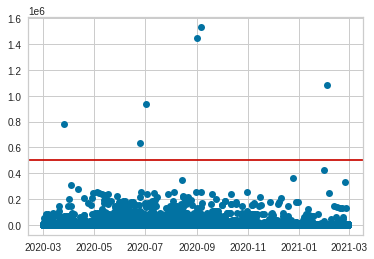

In [ ]:
x = bike.date
y = bike.tripduration

ig, ax = plt.subplots()
ax.plot(x,y, 'o')
ax.axhline(y=500000, color='r')

plt.show()

**step 3.2: Completing**

In this section, we aim to find the missing values and fill the missing values by appropriate guess. However, there is no missing value at all. 

In [ ]:
covid.isnull().sum()

date                   0
CASE_COUNT             0
CASE_COUNT_7DAY_AVG    0
dtype: int64

In [ ]:
bike.isnull().sum()

tripduration    0
date            0
dtype: int64

**step 3.3: Creating**

Here we want to add a few columns to the bike data frame. First, we want to see the number of trips and average trip durations on the daily basis. So, we group the bike data frame by date and creat two columns: ride_count and ave_trip_duration. 

Also, we want to see the moving average of these two new columns to track with the trends. Therefore, we calculate the exponential moving average on those two columns and then we create 2 new columns: ride_count_ema and avg_trip_duration_ema.

Then, we are interested into the effect of weekdays and seasons, so we created two more columns called: weekday and season. 

In [ ]:
bike = bike.groupby('date')['tripduration'].agg(['count', 'mean']).rename(columns={"count": "ride_count", "mean":"avg_trip_duration"})

bike['ride_count_ema'] = bike['ride_count'].ewm(span=7).mean()
bike['avg_trip_duration_ema'] = bike['avg_trip_duration'].ewm(span=7).mean()

bike['weekday']=bike.index.dayofweek
bike['season']=""
for i in range(0,364):
  if (bike.index.month[i] >=3 and bike.index.month[i] <6):
    bike['season'][i] = "Spring";
  elif (bike.index.month[i]  >=6 and bike.index.month[i]  <9):
    bike['season'][i] = "Summer";
  elif (bike.index.month[i]  >=9 and bike.index.month[i]  <12):
    bike['season'][i] = "Fall";
  else:
    bike['season'][i] = "Winter"

bike

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-p

,ride_count,avg_trip_duration,ride_count_ema,avg_trip_duration_ema,weekday,season
date,,,,,,
2020-03-01,510,553.168627,510.000000,553.168627,6,Spring
2020-03-02,817,586.951040,685.428571,572.472863,0,Spring
2020-03-03,779,461.059050,725.891892,524.293917,1,Spring
2020-03-04,866,580.727483,777.131429,544.932478,2,Spring
2020-03-05,898,510.125835,816.750320,533.523387,3,Spring
...,...,...,...,...,...,...
2021-02-24,336,909.577381,217.548632,1190.052180,2,Winter
2021-02-25,343,1700.061224,248.911474,1317.554441,3,Winter
2021-02-26,358,1166.223464,276.183605,1279.721697,4,Winter


**step 3.4: Converting and merging**

Since the starttime and the stoptime in the original dataset contain both date and specific time, we converted them to the date data type so that we could merge the citibike data with the covid data by using left join on matching date. 

In [ ]:
df = bike.merge(covid, how="left", on="date")
df

,date,ride_count,avg_trip_duration,ride_count_ema,avg_trip_duration_ema,weekday,season,CASE_COUNT,CASE_COUNT_7DAY_AVG
0,2020-03-01,510,553.168627,510.000000,553.168627,6,Spring,0,0
1,2020-03-02,817,586.951040,685.428571,572.472863,0,Spring,0,0
2,2020-03-03,779,461.059050,725.891892,524.293917,1,Spring,1,0
3,2020-03-04,866,580.727483,777.131429,544.932478,2,Spring,5,0
4,2020-03-05,898,510.125835,816.750320,533.523387,3,Spring,3,0
...,...,...,...,...,...,...,...,...,...
359,2021-02-24,336,909.577381,217.548632,1190.052180,2,Winter,3440,2899
360,2021-02-25,343,1700.061224,248.911474,1317.554441,3,Winter,3458,3102
361,2021-02-26,358,1166.223464,276.183605,1279.721697,4,Winter,3204,3129
362,2021-02-27,249,1267.224900,269.387704,1276.597497,5,Winter,1973,3056


**Step 4: MLP prediction**

MLP Calculate whether COVID case directly impacts number of bike rides and the avg duration of trips

In [ ]:
predictors = ['ride_count_ema','avg_trip_duration_ema','weekday','season','CASE_COUNT','CASE_COUNT_7DAY_AVG']
output_count = ['ride_count']
output_duration= ['avg_trip_duration']

In [ ]:
# Monday = 0
df_mlp =  pd.DataFrame(df[predictors])
df_mlp = pd.get_dummies(df_mlp, columns=['weekday','season']).drop(columns=['weekday_6','season_Fall'])
df_mlp.shape

(364, 13)

In [ ]:
df_mlp

,ride_count_ema,avg_trip_duration_ema,CASE_COUNT,CASE_COUNT_7DAY_AVG,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,season_Spring,season_Summer,season_Winter
0,510.000000,553.168627,0,0,0,0,0,0,0,0,1,0,0
1,685.428571,572.472863,0,0,1,0,0,0,0,0,1,0,0
2,725.891892,524.293917,1,0,0,1,0,0,0,0,1,0,0
3,777.131429,544.932478,5,0,0,0,1,0,0,0,1,0,0
4,816.750320,533.523387,3,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,217.548632,1190.052180,3440,2899,0,0,1,0,0,0,0,0,1
360,248.911474,1317.554441,3458,3102,0,0,0,1,0,0,0,0,1
361,276.183605,1279.721697,3204,3129,0,0,0,0,1,0,0,0,1
362,269.387704,1276.597497,1973,3056,0,0,0,0,0,1,0,0,1


**Step 4.1: COVID VS Daily Trip count**

In [ ]:
df[df['date']=='2021-01-01']

,date,ride_count,avg_trip_duration,ride_count_ema,avg_trip_duration_ema,weekday,season,CASE_COUNT,CASE_COUNT_7DAY_AVG
306,2021-01-01,206,1098.936893,286.762788,1162.580779,4,Winter,1316,3795


In [ ]:
X = MinMaxScaler().fit_transform(df_mlp)
y = MinMaxScaler().fit_transform(df[output_count])
train_X, valid_X, train_y_count, valid_y_count = train_test_split(X, y, test_size = 58, shuffle = False)

In [ ]:
# train neural network with single hidden layer with 2 nodes
MLPR = MLPRegressor(hidden_layer_sizes=(2,), activation='logistic', solver='lbfgs',
                    random_state=1)
MLPR.fit(train_X, train_y_count)

# RMS error 
mse_train_count = mean_squared_error(train_y_count, MLPR.predict(train_X))
mse_val_count = mean_squared_error(valid_y_count, MLPR.predict(valid_X))
RMSE_train_count = math.sqrt(mse_train_count)
RMSE_val_count = math.sqrt(mse_val_count)

print("Train set Root Mean Square Error", RMSE_train_count)
print("Validation set Root Mean Square Error", RMSE_val_count)

Train set Root Mean Square Error 0.0697880205376463
Validation set Root Mean Square Error 0.057319714896115335


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# train neural network with single hidden layer with 5 nodes
MLPR = MLPRegressor(hidden_layer_sizes=(5,), activation='logistic', solver='lbfgs',
                    random_state=1)
MLPR.fit(train_X, train_y_count)

# RMS error 
mse_train_count = mean_squared_error(train_y_count, MLPR.predict(train_X))
mse_val_count = mean_squared_error(valid_y_count, MLPR.predict(valid_X))
RMSE_train_count = math.sqrt(mse_train_count)
RMSE_val_count = math.sqrt(mse_val_count)

print("Train set Root Mean Square Error", RMSE_train_count)
print("Validation set Root Mean Square Error", RMSE_val_count)

Train set Root Mean Square Error 0.07117903541163143
Validation set Root Mean Square Error 0.06686657209461444


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:

# train neural network with 5 hidden layer with 2 nodes
MLPR = MLPRegressor(hidden_layer_sizes=(2,5), activation='logistic', solver='lbfgs',
                    random_state=1)
MLPR.fit(train_X, train_y_count)

# RMS error 
mse_train_count = mean_squared_error(train_y_count, MLPR.predict(train_X))
mse_val_count = mean_squared_error(valid_y_count, MLPR.predict(valid_X))
RMSE_train_count = math.sqrt(mse_train_count)
RMSE_val_count = math.sqrt(mse_val_count)

print("Train set Root Mean Square Error", RMSE_train_count)
print("Validation set Root Mean Square Error", RMSE_val_count)

Train set Root Mean Square Error 0.06880383486719262
Validation set Root Mean Square Error 0.050702355396374084


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# train neural network with 5 hidden layer with 5 nodes
MLPR = MLPRegressor(hidden_layer_sizes=(5,5), activation='logistic', solver='lbfgs',
                    random_state=1)
MLPR.fit(train_X, train_y_count)

# RMS error 
mse_train_count = mean_squared_error(train_y_count, MLPR.predict(train_X))
mse_val_count = mean_squared_error(valid_y_count, MLPR.predict(valid_X))
RMSE_train_count = math.sqrt(mse_train_count)
RMSE_val_count = math.sqrt(mse_val_count)

print("Train set Root Mean Square Error", RMSE_train_count)
print("Validation set Root Mean Square Error", RMSE_val_count)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train set Root Mean Square Error 0.06866329171604867
Validation set Root Mean Square Error 0.043475313187241044


In [ ]:
# train neural network with 100 hidden layer with 2 nodes
MLPR = MLPRegressor(hidden_layer_sizes=(2,100), activation='logistic', solver='lbfgs',
                    random_state=1)
MLPR.fit(train_X, train_y_count)

# RMS error 
mse_train_count = mean_squared_error(train_y_count, MLPR.predict(train_X))
mse_val_count = mean_squared_error(valid_y_count, MLPR.predict(valid_X))
RMSE_train_count = math.sqrt(mse_train_count)
RMSE_val_count = math.sqrt(mse_val_count)

print("Train set Root Mean Square Error", RMSE_train_count)
print("Validation set Root Mean Square Error", RMSE_val_count)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train set Root Mean Square Error 0.07676294137947026
Validation set Root Mean Square Error 0.04966234718098079


**Step 4.2: COVID VS Daily AVG trip duration**

In [ ]:
# partition data for trip duration


X = MinMaxScaler().fit_transform(df_mlp)
y = MinMaxScaler().fit_transform(df[output_duration])
train_X, valid_X, train_y_duration, valid_y_duration = train_test_split(X, y, test_size = 58, shuffle = False)

In [ ]:
# train neural network with single hidden layer with 2 nodes
MLPR = MLPRegressor(hidden_layer_sizes=(2,), activation='logistic', solver='lbfgs',
                    random_state=1)
MLPR.fit(train_X, train_y_duration)

# RMS error 
mse_train_duration = mean_squared_error(train_y_duration, MLPR.predict(train_X))
mse_val_duration = mean_squared_error(valid_y_duration, MLPR.predict(valid_X))
RMSE_train_duration = math.sqrt(mse_train_duration)
RMSE_val_duration = math.sqrt(mse_val_duration)

print("Train set Root Mean Square Error", RMSE_train_duration)
print("Validation set Root Mean Square Error", RMSE_val_duration)

Train set Root Mean Square Error 0.01633656830376608
Validation set Root Mean Square Error 0.12771764053087958


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# train neural network with single hidden layer with 5 nodes
MLPR = MLPRegressor(hidden_layer_sizes=(5,), activation='logistic', solver='lbfgs',
                    random_state=1)
MLPR.fit(train_X, train_y_duration)

# RMS error 
mse_train_duration = mean_squared_error(train_y_duration, MLPR.predict(train_X))
mse_val_duration = mean_squared_error(valid_y_duration, MLPR.predict(valid_X))
RMSE_train_duration = math.sqrt(mse_train_duration)
RMSE_val_duration = math.sqrt(mse_val_duration)

print("Train set Root Mean Square Error", RMSE_train_duration)
print("Validation set Root Mean Square Error", RMSE_val_duration)

Train set Root Mean Square Error 0.017029462638656713
Validation set Root Mean Square Error 0.1286725902729133


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:

# train neural network with 5 hidden layer with 2 nodes
MLPR = MLPRegressor(hidden_layer_sizes=(2,5), activation='logistic', solver='lbfgs',
                    random_state=1)
MLPR.fit(train_X, train_y_duration)

# RMS error 
mse_train_duration = mean_squared_error(train_y_duration, MLPR.predict(train_X))
mse_val_duration = mean_squared_error(valid_y_duration, MLPR.predict(valid_X))
RMSE_train_duration = math.sqrt(mse_train_duration)
RMSE_val_duration = math.sqrt(mse_val_duration)

print("Train set Root Mean Square Error", RMSE_train_duration)
print("Validation set Root Mean Square Error", RMSE_val_duration)

Train set Root Mean Square Error 0.01990361058751451
Validation set Root Mean Square Error 0.12772402392641072


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# train neural network with 5 hidden layer with 5 nodes
MLPR = MLPRegressor(hidden_layer_sizes=(5,5), activation='logistic', solver='lbfgs',
                    random_state=1)
MLPR.fit(train_X, train_y_duration)

# RMS error 
mse_train_duration = mean_squared_error(train_y_duration, MLPR.predict(train_X))
mse_val_duration = mean_squared_error(valid_y_duration, MLPR.predict(valid_X))
RMSE_train_duration = math.sqrt(mse_train_duration)
RMSE_val_duration = math.sqrt(mse_val_duration)

print("Train set Root Mean Square Error", RMSE_train_duration)
print("Validation set Root Mean Square Error", RMSE_val_duration)

Train set Root Mean Square Error 0.019047978677506468
Validation set Root Mean Square Error 0.12765982436325818


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# train neural network with single 100 layer with 2 nodes
MLPR = MLPRegressor(hidden_layer_sizes=(2,100), activation='logistic', solver='lbfgs',
                    random_state=1)
MLPR.fit(train_X, train_y_duration)

# RMS error 
mse_train_duration = mean_squared_error(train_y_duration, MLPR.predict(train_X))
mse_val_duration = mean_squared_error(valid_y_duration, MLPR.predict(valid_X))
RMSE_train_duration = math.sqrt(mse_train_duration)
RMSE_val_duration = math.sqrt(mse_val_duration)

print("Train set Root Mean Square Error", RMSE_train_duration)
print("Validation set Root Mean Square Error", RMSE_val_duration)

Train set Root Mean Square Error 0.020442263009563037
Validation set Root Mean Square Error 0.12932772101232756


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Step 5: Correlation**

In [ ]:
corr = df.corr();corr

,ride_count,avg_trip_duration,ride_count_ema,avg_trip_duration_ema,weekday,CASE_COUNT,CASE_COUNT_7DAY_AVG
ride_count,1.000000,0.042167,0.919127,0.053444,0.144099,-0.689409,-0.714604
avg_trip_duration,0.042167,1.000000,0.007132,0.662534,0.070178,0.001962,-0.025441
ride_count_ema,0.919127,0.007132,1.000000,0.027719,0.013267,-0.756698,-0.799036
avg_trip_duration_ema,0.053444,0.662534,0.027719,1.000000,0.027573,-0.038543,-0.061398
weekday,0.144099,0.070178,0.013267,0.027573,1.000000,-0.167092,0.008486
CASE_COUNT,-0.689409,0.001962,-0.756698,-0.038543,-0.167092,1.000000,0.931772
CASE_COUNT_7DAY_AVG,-0.714604,-0.025441,-0.799036,-0.061398,0.008486,0.931772,1.000000


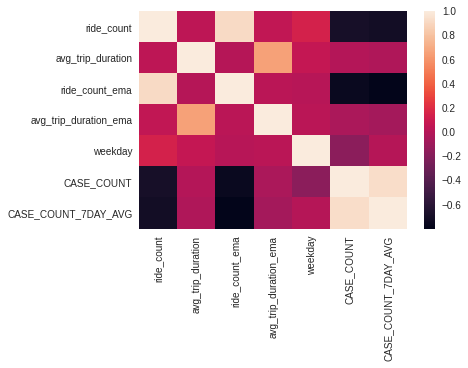

In [ ]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

**Step 6: Model selection and feature importance**

In [ ]:
from sklearn import preprocessing
X = df_mlp.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(X_scaled)



train_X = X.iloc[:306]
valid_X = X.iloc[306:] 
train_y_count = np.asarray(df[output_count]).reshape(-1,1)[0:306]
train_y_count = MinMaxScaler().fit_transform(train_y_count)
valid_y_count = np.asarray(df[output_count]).reshape(-1,1)[306::]
valid_y_count = MinMaxScaler().fit_transform(valid_y_count)

In [ ]:
df.iloc[:306]

,date,ride_count,avg_trip_duration,ride_count_ema,avg_trip_duration_ema,weekday,season,CASE_COUNT,CASE_COUNT_7DAY_AVG
0,2020-03-01,510,553.168627,510.000000,553.168627,6,Spring,0,0
1,2020-03-02,817,586.951040,685.428571,572.472863,0,Spring,0,0
2,2020-03-03,779,461.059050,725.891892,524.293917,1,Spring,1,0
3,2020-03-04,866,580.727483,777.131429,544.932478,2,Spring,5,0
4,2020-03-05,898,510.125835,816.750320,533.523387,3,Spring,3,0
...,...,...,...,...,...,...,...,...,...
301,2020-12-27,276,1061.844203,255.049773,1365.964058,6,Winter,2886,3238
302,2020-12-28,416,1508.209135,295.287330,1401.525327,0,Winter,5374,3386
303,2020-12-29,391,709.961637,319.215497,1228.634404,1,Winter,5206,3544
304,2020-12-30,326,759.539877,320.911623,1111.360773,2,Winter,4964,3705


In [ ]:
print('X shape: {}'.format(train_X.shape))
print('y shape: {}'.format(train_y_count.shape))
print('X_test shape: {}'.format(valid_X.shape))

X shape: (306, 13)
y shape: (306, 1)
X_test shape: (58, 13)


In [ ]:
#trip count

#Machine Learning Models -- Model Comparison
from sklearn import linear_model

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor



# linear regression
Linear = LinearRegression()
Linear.fit(train_X, train_y_count)
y_pred = Linear.predict(valid_X)
Linear.score(train_X, train_y_count)
acc_Linear = round(Linear.score(train_X, train_y_count) * 100, 2)
val_RMSE_Linear = math.sqrt(mean_squared_error(valid_y_count, y_pred))


#Stochastic Gradient Descent (SGD):

sgd = linear_model.SGDRegressor()
sgd.fit(train_X, train_y_count)
y_pred = sgd.predict(valid_X)
sgd.score(train_X, train_y_count)
acc_sgd = round(sgd.score(train_X, train_y_count) * 100, 2)
val_RMSE_sgd = math.sqrt(mean_squared_error(valid_y_count, y_pred))

# Random Forest

random_forest = RandomForestRegressor(n_estimators=100)
random_forest.fit(train_X, train_y_count)
y_prediction = random_forest.predict(valid_X)
random_forest.score(train_X, train_y_count)
acc_random_forest = round(random_forest.score(train_X, train_y_count) * 100, 2)
val_RMSE_random_forest = math.sqrt(mean_squared_error(valid_y_count, y_pred))


# K Nearest Neighbor

knn = KNeighborsRegressor(n_neighbors = 3) 
knn.fit(train_X, train_y_count)  
y_pred = knn.predict(valid_X)  
acc_knn = round(knn.score(train_X, train_y_count) * 100, 2)
val_RMSE_knn = math.sqrt(mean_squared_error(valid_y_count, y_pred))


# MLPR

MLPRegressor = MLPRegressor(hidden_layer_sizes=(2,))
MLPRegressor.fit(train_X, train_y_count)
y_pred = MLPRegressor.predict(valid_X)
acc_MLPRegressor = round(MLPRegressor.score(train_X, train_y_count) * 100, 2)
val_RMSE_MLPR = math.sqrt(mean_squared_error(valid_y_count, y_pred))


# Decision Tree

decision_tree = DecisionTreeRegressor() 
decision_tree.fit(train_X, train_y_count)  
y_pred = decision_tree.predict(valid_X)  
acc_decision_tree = round(decision_tree.score(train_X, train_y_count) * 100, 2)
val_RMSE_decision_tree = math.sqrt(mean_squared_error(valid_y_count, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conver

In [ ]:
#Result Comparison

results = pd.DataFrame({
    'Model': [ 'Linear Regression','KNN',  
              'Random Forest',  'MLPR', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [ acc_Linear, acc_knn, 
              acc_random_forest, acc_MLPRegressor, 
              acc_sgd, acc_decision_tree],
'valid_RMSE': [val_RMSE_Linear, val_RMSE_knn, val_RMSE_sgd, val_RMSE_random_forest,
               val_RMSE_MLPR, val_RMSE_decision_tree]          
})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(6)

,Model,valid_RMSE
Score,,
100.00,Decision Tree,0.520037
97.10,Random Forest,0.465869
86.82,KNN,0.504210
85.78,Linear Regression,0.520061
58.67,Stochastic Gradient Decent,0.613925
-27.76,MLPR,0.465869


In [ ]:
ran_for = RandomForestRegressor(n_estimators=100)
ran_for.fit(train_X, train_y_count)
importances = pd.DataFrame({'feature':df_mlp.columns[train_X.columns],'importance':np.round(ran_for.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(17)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


,importance
feature,
ride_count_ema,0.843
CASE_COUNT,0.056
CASE_COUNT_7DAY_AVG,0.045
avg_trip_duration_ema,0.022
weekday_5,0.020
weekday_0,0.003
weekday_1,0.003
weekday_4,0.003
weekday_3,0.002


**Step 7: Unsupervised Learning -- clustering**

In [ ]:
import pandas as pd
from datetime import datetime
import numpy as np 
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


import numbers
import math
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
mar2020 = pd.read_csv("JC-202003-citibike-tripdata.csv")
apr2020 = pd.read_csv("JC-202004-citibike-tripdata.csv")
may2020 = pd.read_csv("JC-202005-citibike-tripdata.csv")
jun2020 = pd.read_csv("JC-202006-citibike-tripdata.csv")
jul2020 = pd.read_csv("JC-202007-citibike-tripdata.csv")
aug2020 = pd.read_csv("JC-202008-citibike-tripdata.csv")
sep2020 = pd.read_csv("JC-202009-citibike-tripdata.csv")
oct2020 = pd.read_csv("JC-202010-citibike-tripdata.csv")
nov2020 = pd.read_csv("JC-202011-citibike-tripdata.csv")
dec2020 = pd.read_csv("JC-202012-citibike-tripdata.csv")
jan2021 = pd.read_csv("JC-202101-citibike-tripdata.csv")
feb2021 = pd.read_csv("JC-202102-citibike-tripdat.csv")

bike = [mar2020, apr2020, may2020, jun2020, jul2020, aug2020, sep2020, oct2020, nov2020, dec2020, jan2021, feb2021]
bike = pd.concat(bike)

bike['date'] = pd.to_datetime(bike['starttime']).dt.normalize()

bike
df = bike.copy()

In [ ]:
bike.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

In [ ]:
df.set_index('start station name', inplace = True)

In [ ]:
columns_to_keep = ['tripduration','start station id','date']

In [ ]:
df = df[columns_to_keep]

In [ ]:
df['rides'] = 1

In [ ]:
group = df.groupby(['start station id','date']).agg(['mean','sum'])

In [ ]:
group

tripduration         rides    
                                     mean     sum  mean sum
start station id date                                      
3184             2020-03-01    420.800000    2104     1   5
                 2020-03-02    541.692308   14084     1  26
                 2020-03-03    502.777778    9050     1  18
                 2020-03-04    444.047619    9325     1  21
                 2020-03-05    563.923077   14662     1  26
...                                   ...     ...   ...  ..
3792             2021-02-24    347.000000    3123     1   9
                 2021-02-25    599.538462    7794     1  13
                 2021-02-26  30571.583333  366859     1  12
                 2021-02-27   1008.250000   12099     1  12
                 2021-02-28    418.750000    1675     1   4

[17567 rows x 4 columns]

In [ ]:
drop_column = [('tripduration', 'sum'), ('rides','mean')]
group.drop(columns = drop_column, inplace = True)
group

tripduration rides
                                     mean   sum
start station id date                          
3184             2020-03-01    420.800000     5
                 2020-03-02    541.692308    26
                 2020-03-03    502.777778    18
                 2020-03-04    444.047619    21
                 2020-03-05    563.923077    26
...                                   ...   ...
3792             2021-02-24    347.000000     9
                 2021-02-25    599.538462    13
                 2021-02-26  30571.583333    12
                 2021-02-27   1008.250000    12
                 2021-02-28    418.750000     4

[17567 rows x 2 columns]

In [ ]:
group2 = group.unstack(level = -1)

In [ ]:
group2 = group2.fillna(value = 0)

In [ ]:
df_norm = (group2 - group2.mean())/group2.std()

In [ ]:
pip install fastcluster

In [ ]:
from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import fastcluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
df_norm.index

Int64Index([3184, 3185, 3186, 3187, 3191, 3192, 3193, 3194, 3195, 3196, 3198,
            3199, 3201, 3202, 3203, 3205, 3206, 3207, 3209, 3210, 3211, 3212,
            3213, 3214, 3220, 3225, 3267, 3268, 3269, 3270, 3272, 3273, 3275,
            3276, 3277, 3278, 3279, 3280, 3281, 3426, 3481, 3483, 3638, 3639,
            3640, 3677, 3678, 3679, 3681, 3694, 3791, 3792],
           dtype='int64', name='start station id')

In [ ]:
df_norm.index = df_norm.index.astype(str)

In [ ]:

kmeans = KMeans(n_clusters=8,
                n_init=20,
                init='random',
                tol=1e-4,
                random_state=1,
                verbose=True)

kmeans.fit(df_norm)

y = kmeans.predict(df_norm)

membk = pd.Series(kmeans.labels_,df_norm.index)
print('\033[1m'+'k-Means cluster membership:'+'\033[0m')
for key, item in membk.groupby(membk):
    print(key, ': ', ', '.join(item.index))

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 21536.78583621668
start iteration
done sorting
end inner loop
Iteration 1, inertia 21536.78583621668
center shift 0.000000e+00 within tolerance 9.807693e-05
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 21765.10095299129
start iteration
done sorting
end inner loop
Iteration 1, inertia 21523.428182136933
start iteration
done sorting
end inner loop
Iteration 2, inertia 21523.428182136933
center shift 0.000000e+00 within tolerance 9.807693e-05
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 21756.332774307473
start iteration
done sorting
end inner loop
Iteration 1, inertia 21563.55348334498
start iteration
done sorting
end inner loop
Iteration 2, inertia 21423.24884575523
start iteration
done sorting
end inner loop
Iteration 3, inertia 21375.84620632005
start iteration
done sorting
end inner loop
Iteration 4, inertia 2

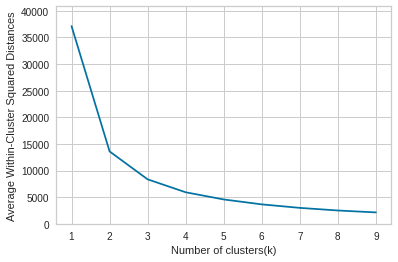

In [ ]:
inertia = []
for n_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 10), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

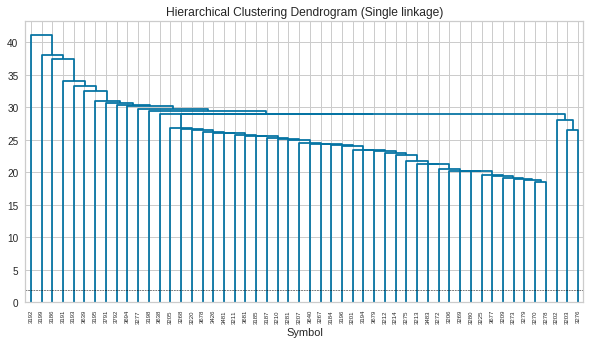

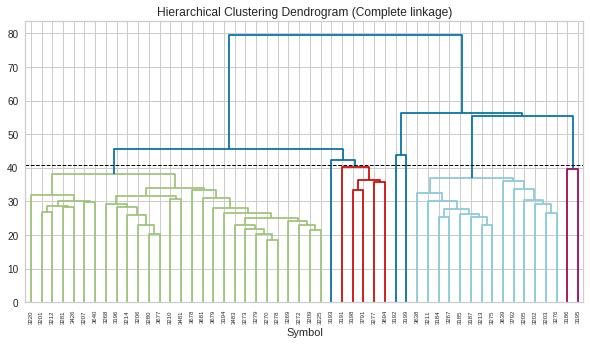

In [ ]:
d_norm = pairwise.pairwise_distances(df_norm, metric='euclidean')
pd.DataFrame(d_norm, columns=df_norm.index, index=df_norm.index).head(5)


#Single linkage
Z = linkage(df_norm, method='single')

fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Single linkage)')
plt.xlabel('Symbol')
dendrogram(Z, labels= df_norm.index.values.tolist(), color_threshold=1.9)
plt.axhline(y=1.9, color='black', linewidth=0.5, linestyle='dashed')
plt.show()

#Complete linkage
Z = fastcluster.complete (df_norm)
fig = plt.figure(figsize=(10, 6))
fig.subplots_adjust(bottom=0.23)
plt.title('Hierarchical Clustering Dendrogram (Complete linkage)')
plt.xlabel('Symbol')
dendrogram(Z, labels= df_norm.index.values.tolist(), color_threshold=40.75)
plt.axhline(y=40.75, color='black', linewidth=1, linestyle='dashed')
plt.show()


In [ ]:
# Complete Linkage (Maximum distance)
memb = fcluster(linkage(df_norm, 'complete'), 8, criterion='maxclust')
memb = pd.Series(memb, index=df_norm.index)
print('\033[1m'+'Complete linkage cluster membership:'+'\033[0m')
for key, item in memb.groupby(memb):
    print(key, ': ', ', '.join(item.index))

Complete linkage cluster membership:
1 :  3194, 3196, 3201, 3206, 3207, 3209, 3210, 3212, 3214, 3220, 3225, 3268, 3269, 3270, 3272, 3273, 3278, 3279, 3280, 3281, 3426, 3481, 3483, 3640, 3677, 3678, 3679, 3681
2 :  3198, 3277, 3694, 3791
3 :  3191
4 :  3193
5 :  3192
6 :  3199
7 :  3184, 3185, 3187, 3202, 3203, 3205, 3211, 3213, 3267, 3275, 3276, 3638, 3639, 3792
8 :  3186, 3195


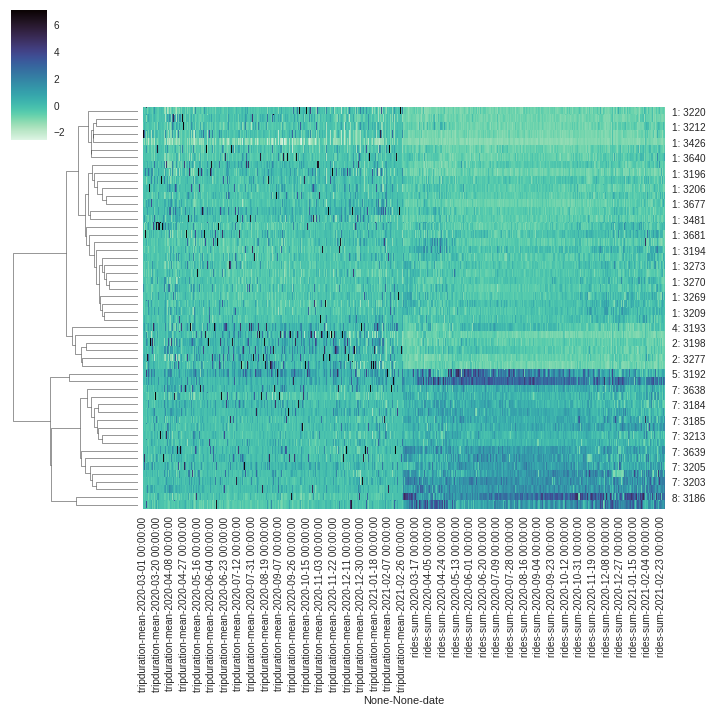

In [ ]:
df_norm.index = ['{}: {}'.format(cluster, state) for cluster, state in zip(memb, df_norm.index)]
fastcluster.complete (df_norm)
sns.clustermap(df_norm, method='complete', col_cluster=False,  cmap="mako_r")
plt.show()

**Step 8: Association Rules**

In [ ]:
%matplotlib inline

from pathlib import Path
import heapq
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pylab as plt

## you may need to install mlxtend
#import sys
#!{sys.executable} -m pip install mlxtend

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
mar2019 = pd.read_csv("JC-201903-citibike-tripdata.csv")
apr2019 = pd.read_csv("JC-201904-citibike-tripdata.csv")
may2019 = pd.read_csv("JC-201905-citibike-tripdata.csv")
jun2019 = pd.read_csv("JC-201906-citibike-tripdata.csv")
jul2019 = pd.read_csv("JC-201907-citibike-tripdata.csv")
aug2019 = pd.read_csv("JC-201908-citibike-tripdata.csv")
sep2019 = pd.read_csv("JC-201909-citibike-tripdata.csv")
oct2019 = pd.read_csv("JC-201910-citibike-tripdata.csv")
nov2019 = pd.read_csv("JC-201911-citibike-tripdata.csv")
dec2019 = pd.read_csv("JC-201912-citibike-tripdata.csv")
jan2020 = pd.read_csv("JC-202001-citibike-tripdata.csv")
feb2020 = pd.read_csv("JC-202002-citibike-tripdata.csv")

bike_2019_2020 = [mar2019, apr2019, may2019, jun2019, jul2019, aug2019, sep2019, oct2019, nov2019, dec2019, jan2020, feb2020]
bike_2019_2020 = pd.concat(bike_2019_2020)

bike_2019_2020['date'] = pd.to_datetime(bike_2019_2020['starttime']).dt.normalize()

In [ ]:
mar2020 = pd.read_csv("JC-202003-citibike-tripdata.csv")
apr2020 = pd.read_csv("JC-202004-citibike-tripdata.csv")
may2020 = pd.read_csv("JC-202005-citibike-tripdata.csv")
jun2020 = pd.read_csv("JC-202006-citibike-tripdata.csv")
jul2020 = pd.read_csv("JC-202007-citibike-tripdata.csv")
aug2020 = pd.read_csv("JC-202008-citibike-tripdata.csv")
sep2020 = pd.read_csv("JC-202009-citibike-tripdata.csv")
oct2020 = pd.read_csv("JC-202010-citibike-tripdata.csv")
nov2020 = pd.read_csv("JC-202011-citibike-tripdata.csv")
dec2020 = pd.read_csv("JC-202012-citibike-tripdata.csv")
jan2021 = pd.read_csv("JC-202101-citibike-tripdata.csv")
feb2021 = pd.read_csv("JC-202102-citibike-tripdat.csv")

bike_2020_2021 = [mar2020, apr2020, may2020, jun2020, jul2020, aug2020, sep2020, oct2020, nov2020, dec2020, jan2021, feb2021]
bike_2020_2021 = pd.concat(bike_2020_2021)

bike_2020_2021['date'] = pd.to_datetime(bike_2020_2021['starttime']).dt.normalize()

In [ ]:
drop_column = ['starttime','stoptime','start station id','tripduration',
               'start station latitude','start station longitude','end station id','end station latitude','end station longitude',
               'bikeid', 'usertype','birth year','gender']


bike_2019_2020 = bike_2019_2020.drop(columns=drop_column)
bike_2020_2021 = bike_2020_2021.drop(columns=drop_column)

bike_2019_2020 = bike_2019_2020.set_index('date')
bike_2019_2020 = pd.get_dummies(bike_2019_2020, columns=['start station name','end station name'])

bike_2020_2021 = bike_2020_2021.set_index('date')
bike_2020_2021 = pd.get_dummies(bike_2020_2021, columns=['start station name','end station name'])

In [ ]:
frequent_itemsets = apriori(bike_2019_2020, min_support=0.005, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

rules.sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(start station name_Fairmount Ave),(end station name_Sip Ave),0.008682,0.045209,0.006192,0.713217,15.775860,0.005800,3.329313
1,(start station name_Bergen Ave),(end station name_Sip Ave),0.008343,0.045209,0.005718,0.685409,15.160777,0.005341,3.035026
0,(start station name_Astor Place),(end station name_Sip Ave),0.009435,0.045209,0.006175,0.654513,14.477369,0.005749,2.763608
21,(end station name_Bergen Ave),(start station name_Sip Ave),0.007876,0.047601,0.005206,0.660965,13.885647,0.004831,2.809149
23,(end station name_McGinley Square),(start station name_Sip Ave),0.012432,0.047601,0.008001,0.643576,13.520329,0.007409,2.672096
20,(end station name_Astor Place),(start station name_Sip Ave),0.009644,0.047601,0.005901,0.611873,12.854318,0.005442,2.453836
22,(end station name_Lincoln Park),(start station name_Sip Ave),0.009084,0.047601,0.005047,0.555614,11.672423,0.004615,2.143182
18,(end station name_Sip Ave),(start station name_McGinley Square),0.045209,0.018389,0.009702,0.214601,11.670217,0.008871,1.249825
17,(start station name_McGinley Square),(end station name_Sip Ave),0.018389,0.045209,0.009702,0.527603,11.670217,0.008871,2.021163
8,(end station name_Dixon Mills),(start station name_Grove St PATH),0.014908,0.113022,0.008631,0.578990,5.122794,0.006947,2.106785


In [ ]:
frequent_itemsets = apriori(bike_2020_2021, min_support=0.005, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

rules.sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(start station name_Lincoln Park),(end station name_Lincoln Park),0.017098,0.017687,0.007910,0.462603,26.155232,0.007607,1.827911
6,(end station name_Lincoln Park),(start station name_Lincoln Park),0.017687,0.017098,0.007910,0.447212,26.155232,0.007607,1.778080
0,(start station name_Bergen Ave),(end station name_Sip Ave),0.010389,0.034371,0.005043,0.485443,14.123630,0.004686,1.876622
9,(start station name_McGinley Square),(end station name_Sip Ave),0.016467,0.034371,0.006447,0.391495,11.390285,0.005881,1.586888
16,(end station name_McGinley Square),(start station name_Sip Ave),0.012650,0.038221,0.005230,0.413462,10.817749,0.004747,1.639755
14,(end station name_Paulus Hook),(start station name_Paulus Hook),0.024992,0.024456,0.005221,0.208892,8.541618,0.004609,1.233137
15,(start station name_Paulus Hook),(end station name_Paulus Hook),0.024456,0.024992,0.005221,0.213470,8.541618,0.004609,1.239632
4,(start station name_Liberty Light Rail),(end station name_Liberty Light Rail),0.054254,0.054872,0.025228,0.465006,8.474393,0.022251,1.766616
3,(end station name_Liberty Light Rail),(start station name_Liberty Light Rail),0.054872,0.054254,0.025228,0.459769,8.474393,0.022251,1.750632
10,(end station name_Morris Canal),(start station name_Morris Canal),0.028151,0.028052,0.005934,0.210791,7.514180,0.005144,1.231546
